<a href="https://colab.research.google.com/github/nabiacrypto/Mentalhealth/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Processed data, model, or encoder not found. Starting preprocessing and training...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 172s 180ms/step - accuracy: 0.4542 - loss: 1.3797 - val_accuracy: 0.6600 - val_loss: 0.8591
Epoch 2/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 213s 191ms/step - accuracy: 0.7043 - loss: 0.7520 - val_accuracy: 0.7025 - val_loss: 0.7761
Epoch 3/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 196s 185ms/step - accuracy: 0.7739 - loss: 0.5969 - val_accuracy: 0.7222 - val_loss: 0.7482
Epoch 4/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 205s 188ms/step - accuracy: 0.8234 - loss: 0.4795 - val_accuracy: 0.7175 - val_loss: 0.7810
Epoch 5/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 199s 184ms/step - accuracy: 0.8613 - loss: 0.3833 - val_accuracy: 0.7113 - val_loss: 0.8523


Saving processed data and model...
Finished preprocessing and training.
Evaluating the model...
498/498 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.7213 - loss: 0.8050
Test Loss: 0.8016
Test Accuracy: 0.7249
498/498 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step


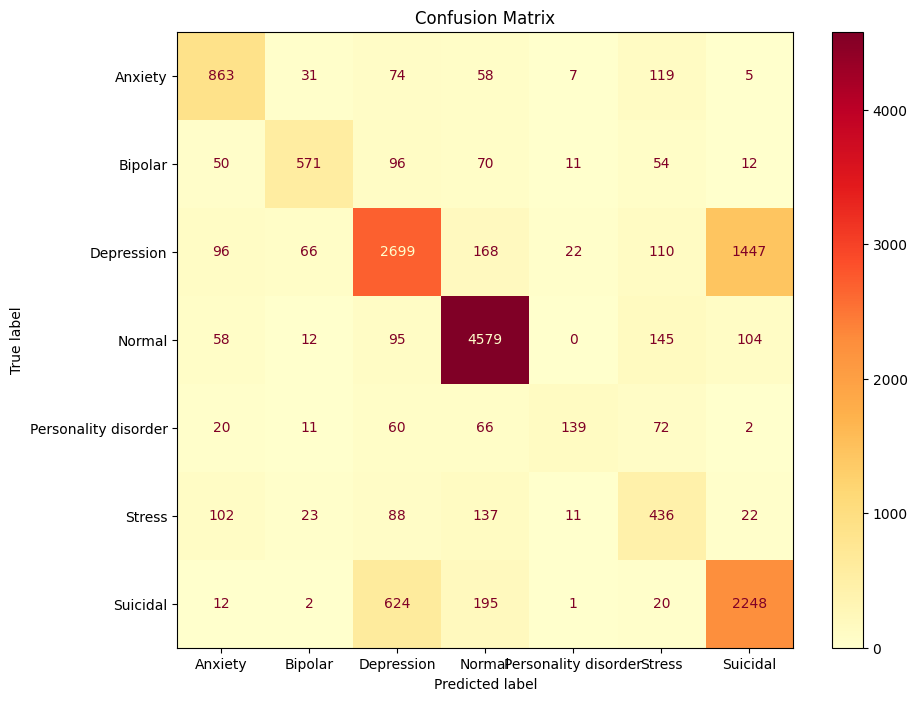

In [9]:
# Download NLTK resources if needed
# Use LookupError when checking if a resource exists locally
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
     nltk.download('punkt')
# Re-enable the check and download for 'punkt_tab' as it is required by word_tokenize
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
     print("Downloading 'punkt_tab'...") # Added a print statement
     nltk.download('punkt_tab') # Un-commented this line


# %%
# Define file paths for saving/loading
PROCESSED_DATA_DIR = '/content/processed_data'
MODEL_SAVE_PATH = '/content/drive/MyDrive/GRU.h5' # Using .h5 format for simplicity
X_TRAIN_PATH = os.path.join(PROCESSED_DATA_DIR, 'X_train.npy')
X_TEST_PATH = os.path.join(PROCESSED_DATA_DIR, 'X_test.npy')
Y_TRAIN_PATH = os.path.join(PROCESSED_DATA_DIR, 'y_train.npy')
Y_TEST_PATH = os.path.join(PROCESSED_DATA_DIR, 'y_test.npy')
LABEL_ENCODER_PATH = os.path.join(PROCESSED_DATA_DIR, 'label_encoder.pkl') # Save the encoder too

# Create the directory if it doesn't exist
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

# %%
# Check if processed data and model exist
if os.path.exists(X_TRAIN_PATH) and os.path.exists(MODEL_SAVE_PATH) and os.path.exists(LABEL_ENCODER_PATH):
    print("Loading processed data and model from files...")
    try:
        X_train = np.load(X_TRAIN_PATH)
        X_test = np.load(X_TEST_PATH)
        y_train = np.load(Y_TRAIN_PATH)
        y_test = np.load(Y_TEST_PATH)
        model = load_model(MODEL_SAVE_PATH)

        # Load the LabelEncoder
        with open(LABEL_ENCODER_PATH, 'rb') as f:
            encoder = pickle.load(f)

        print("Loaded data and model.")
    except Exception as e:
        print(f"Error loading saved data/model: {e}")
        print("Proceeding with reprocessing and training.")
        # If loading fails, fall through to the 'else' block for reprocessing
        # The else block starts here
        pass # This allows the code to continue to the 'else' block if loading fails

else:
    print("Processed data, model, or encoder not found. Starting preprocessing and training...")
    # %%
    # --- Data Loading and Preprocessing (Keep this block) ---
    df = pd.read_csv('/content/drive/MyDrive/Combined Data.csv')
    # df.head(5) # Optional: display head
    # df.describe(include='all') # Optional: display describe
    # df.info() # Optional: display info
    df = df.drop('Unnamed: 0',axis = 1)

    # Optional: Plot distribution (if you want to see it each time)
    # plt.figure(figsize=(10, 8))
    # sns.countplot(x='status', data=df,palette='YlOrRd')
    # plt.title('label Distribution')
    # plt.show()

    # %%
    # Clean Text
    def remove_missing_values(df):
        return df.dropna()

    def remove_urls(text):
        return re.sub(r'http\S+', '', text)

    def remove_mentions(text):
        return re.sub(r'@\w+', '', text)

    def remove_emojis(text):
        emoji_pattern = re.compile("[\U00010000-\U0010FFFF]", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    def remove_special_chars(text):
        allowed_chars = set(string.ascii_letters + "áéíóúãõàâêôç ")
        return ''.join(c for c in text if c in allowed_chars)

    def clean_text(text):
        if not isinstance(text, str):
            return ''

        text = text.lower().strip()
        text = remove_urls(text)
        text = remove_mentions(text)
        text = remove_emojis(text)
        text = remove_special_chars(text)
        text = re.sub(r'\s+', ' ', text)

        return text

    df['statement'] = df['statement'].apply(clean_text)

    # %%
    # Tokenization and Stopword Removal
    # Ensure stopwords are loaded before using them
    from nltk.corpus import stopwords # Re-import or ensure it's available here
    # Check if 'stopwords' is available, otherwise download
    try:
        stopwords_list = stopwords.words('english')
    except LookupError:
        print("Downloading stopwords...")
        nltk.download('stopwords')
        stopwords_list = stopwords.words('english')

    stopwords_set = set(stopwords_list)


    def tokenize_and_remove_stopwords(text):
        # Ensure 'punkt' tokenizer is available before calling word_tokenize
        try:
            nltk.data.find('tokenizers/punkt')
        except LookupError:
            print("Downloading punkt tokenizer...")
            nltk.download('punkt') # Correctly indented
        # Tokenize after ensuring punkt is available
        tokens = word_tokenize(text) # Correctly indented
        # Use the stopwords_set for faster lookup
        tokens = [word for word in tokens if word.lower() not in stopwords_set]
        return tokens

    df['tokenized_statement'] = df['statement'].apply(tokenize_and_remove_stopwords)

    # %%
    # Text Vectorization (Tokenization and Padding)
    # Define num_words and maxlen as variables for clarity
    VOCAB_SIZE = 10000
    MAX_LEN = 100 # Use the length defined later in pad_sequences

    tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>") # Add OOV token
    # Fit on the joined tokens for a better vocabulary build
    tokenizer.fit_on_texts([' '.join(tokens) for tokens in df['tokenized_statement']])

    sequences = tokenizer.texts_to_sequences([' '.join(tokens) for tokens in df['tokenized_statement']])

    X = pad_sequences(sequences, padding='post', maxlen=MAX_LEN)

    # %%
    # Label Encoding
    encoder = LabelEncoder()
    # Ensure the column name is correct and consistent
    df['encoded_status'] = encoder.fit_transform(df['status'])
    y = df['encoded_status'] # Assign the encoded column to y

    # %%
    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # %%
    # Build the Model
    # Ensure input_length matches MAX_LEN used in pad_sequences
    model = Sequential([
        Embedding(input_dim=VOCAB_SIZE, output_dim=64, input_length=MAX_LEN), # Use MAX_LEN here
        # Changed from LSTM to GRU
        GRU(128, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        # Ensure output layer size matches the number of classes
        # Number of classes is the number of unique values in y
        Dense(len(encoder.classes_), activation='softmax') # Use number of classes from encoder
    ])

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    # Print model summary to verify layers
    model.summary()

    # %%
    # Train the Model
    print("Training the model...")
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2
    )

    # %%
    # Save processed data and model
    print("Saving processed data and model...")
    np.save(X_TRAIN_PATH, X_train)
    np.save(X_TEST_PATH, X_test)
    np.save(Y_TRAIN_PATH, y_train)
    np.save(Y_TEST_PATH, y_test)
    model.save(MODEL_SAVE_PATH)

    # Save the LabelEncoder
    with open(LABEL_ENCODER_PATH, 'wb') as f:
        pickle.dump(encoder, f)

    print("Finished preprocessing and training.")


# %%
# Evaluate the Model (can be run regardless of whether model was loaded or trained)
print("Evaluating the model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# %%
# Display Confusion Matrix (Optional)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
# Use the classes from the encoder for labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap=plt.cm.YlOrRd)
plt.title('Confusion Matrix')
plt.show()